In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import random
def load_dataset(file_path):
    data=pd.read_csv(file_path)
    print(data.head())
    return data
file_path='/content/sample_data/Social_Network_Ads.csv'
dataset=load_dataset(file_path)
X=dataset[['Age', 'EstimatedSalary']].values
y=dataset['Purchased'].values
print("Features:\n", X[:5])
print("Labels:\n", y[:5])


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Features:
 [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
Labels:
 [0 0 0 0 0]


In [3]:

def train_test_split(X,y,test_size=0.2):
    data = np.hstack((X,y.reshape(-1, 1)))
    np.random.shuffle(data)
    split_index=int(len(data)*(1 - test_size))
    train_data=data[:split_index,:]
    test_data=data[split_index:,:]
    X_train=train_data[:, :-1]
    y_train=train_data[:, -1]
    X_test=test_data[:, :-1]
    y_test=test_data[:, -1]
    return X_train, X_test, y_train, y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (320, 2) (320,)
Testing data shape: (80, 2) (80,)


In [4]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1-point2)**2))

def knn(X_train,y_train,X_test,k=3):
    y_pred = []
    for test_point in X_test:
        distances=[euclidean_distance(test_point, x_train) for x_train in X_train]
        neighbors_indices=np.argsort(distances)[:k]
        neighbors_labels=[y_train[i] for i in neighbors_indices]
        most_common=Counter(neighbors_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)
k=3
y_pred=knn(X_train, y_train, X_test, k=k)
print("predicted labels",y_pred)
print("actual labels",y_test)


Predicted labels:
 [0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 0]
Actual labels:
 [0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0]


In [5]:
def accuracy(y_true,y_pred):
    correct=np.sum(y_true == y_pred)
    return correct/len(y_true)

def confusion_matrix(y_true,y_pred):
    unique_classes=np.unique(y_true)
    matrix=np.zeros((len(unique_classes),len(unique_classes)),dtype=int)

    for true_label,pred_label in zip(y_true,y_pred):
        matrix[int(true_label), int(pred_label)]+=1

    return matrix

acc = accuracy(y_test, y_pred)
print(f"accuracy: {acc * 100:.2f}%")
conf_matrix=confusion_matrix(y_test, y_pred)
print("confusion Matrix:\n", conf_matrix)


Accuracy: 82.50%
Confusion Matrix:
 [[43  7]
 [ 7 23]]


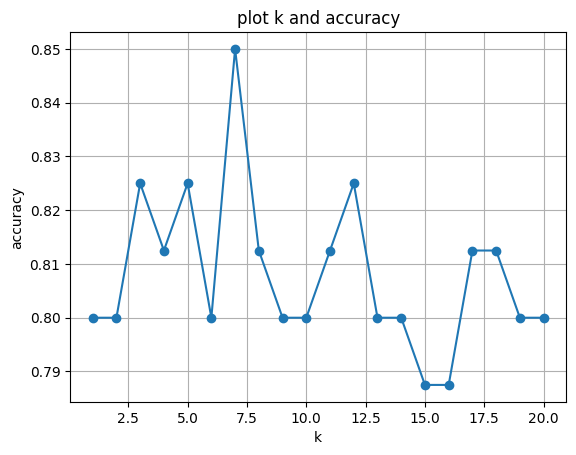

In [6]:
import matplotlib.pyplot as plt
def plot_k_vs_accuracy(X_train, y_train, X_test, y_test):
    k_values = range(1, 21)
    accuracies = []
    for k in k_values:
        y_pred = knn(X_train, y_train, X_test, k)
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('plot k and accuracy')
    plt.grid(True)
    plt.show()
plot_k_vs_accuracy(X_train, y_train, X_test, y_test)
